In [24]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import style
import plotly.express as px

In [25]:
style.use('ggplot')

In [26]:
tickers=['CIT','AMZN','AAPL']
start=dt.datetime(2021,1,1)
end=dt.datetime(2021,5,1)
scenarios= 1000
returns =pd.DataFrame()

for ticker in tickers:
    data=web.DataReader(ticker,'yahoo',start,end)
    data=pd.DataFrame(data)
    data[ticker]= data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns= returns.join(data[[ticker]],how='outer')

portfolio_returns=[]
sharpe_ratio=[]
risk=[]
portfolio_weights=[]
risk_free_rate=0
for scenario in range(scenarios):
    weights=np.random.random_sample(len(tickers))
    weights= np.round(weights/np.sum(weights),4)
    portfolio_weights.append(weights)

    annual_returns=np.sum(returns.mean()*weights)*252
    portfolio_returns.append(annual_returns)
    
    matrix_cov= returns.cov()*252
    variance=np.dot(weights.T,np.dot(matrix_cov,weights))
    sd=np.sqrt(variance)
    risk.append(sd)
    
    sharpe=(annual_returns-risk_free_rate)/sd
    sharpe_ratio.append(sharpe)
    
portfolio_returns=np.array(portfolio_returns)
sharpe_ratio=np.array(sharpe_ratio)
risk=np.array(risk)

matrix=[portfolio_returns,sharpe_ratio,risk,portfolio_weights]
metrics=pd.DataFrame(matrix).T
metrics.columns=['Returns','Sharpe_Ratio','Risk','Weights']
# metrics.head()


In [27]:
min_risk=metrics.iloc[metrics['Risk'].astype(float).idxmin()]
highest_return=metrics.iloc[metrics['Returns'].astype(float).idxmax()]
high_sharpe=metrics.iloc[metrics['Sharpe_Ratio'].astype(float).idxmax()]

print('Minimum_risk')
print(min_risk)
print(tickers)
print('--------------------------------------------')

print('Highest Returns')
print(highest_return)
print(tickers)
print('--------------------------------------------')

print('Highest Sharpe ratio')
print(high_sharpe)
print(tickers)
print('--------------------------------------------')

Minimum_risk
Returns                         0.532418
Sharpe_Ratio                     2.56373
Risk                            0.207673
Weights         [0.2997, 0.6019, 0.0984]
Name: 127, dtype: object
['CIT', 'AMZN', 'AAPL']
--------------------------------------------
Highest Returns
Returns                           1.2368
Sharpe_Ratio                     3.38063
Risk                            0.365849
Weights         [0.9289, 0.0448, 0.0263]
Name: 270, dtype: object
['CIT', 'AMZN', 'AAPL']
--------------------------------------------
Highest Sharpe ratio
Returns                         0.931726
Sharpe_Ratio                     3.49412
Risk                            0.266656
Weights         [0.6459, 0.3537, 0.0004]
Name: 271, dtype: object
['CIT', 'AMZN', 'AAPL']
--------------------------------------------


In [28]:
import plotly.express as px
fig = px.scatter_3d(metrics, x='Risk', y='Returns', z='Sharpe_Ratio',color='Sharpe_Ratio')
fig.show()

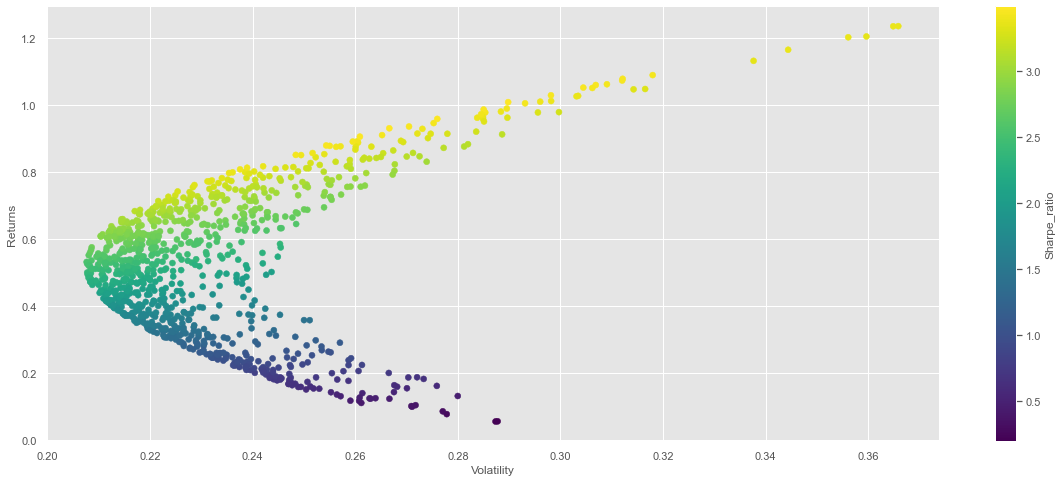

In [29]:
# Interactive plot
plt.figure(figsize=(20,8))
plt.scatter(risk,portfolio_returns,c=portfolio_returns/risk,cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label='Sharpe_ratio')

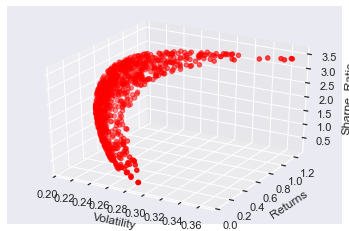

In [30]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = risk
y = portfolio_returns
z = portfolio_returns/risk

ax.set_xlabel("Volatility")
ax.set_ylabel("Returns")
ax.set_zlabel("Sharpe_Ratio")

ax.scatter(x, y, z,color='Red')

plt.show()

In [31]:
import plotly.express as px
fig = px.scatter_3d(metrics, x='Risk', y='Returns', z='Sharpe_Ratio',
              color='Risk', title="3D Interactive Plot")
fig.show()